In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from PIL import Image
from IPython.display import HTML


In [4]:
df = pd.read_csv('export.tsv', sep='\t')
df.head()

,Recording timestamp,Computer timestamp,Sensor,Export date,Participant name,Recording date,Gaze point X,Gaze point Y,Gaze point left X,Gaze point left Y,...,Gaze point right X (MCSnorm),Gaze point right Y (MCSnorm),Client area position X (DACSpx),Client area position Y (DACSpx),Viewport position X,Viewport position Y,Viewport width,Viewport height,Full page width,Full page height
0,136480,3984990841,Eye Tracker,07.09.2020,Participant1,07.09.2020,1308.0,1664.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,144908,3984999269,Eye Tracker,07.09.2020,Participant1,07.09.2020,816.0,1197.0,816.0,1197.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,153128,3985007489,Eye Tracker,07.09.2020,Participant1,07.09.2020,863.0,1313.0,863.0,1313.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,161554,3985015915,Eye Tracker,07.09.2020,Participant1,07.09.2020,852.0,884.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,169881,3985024242,Eye Tracker,07.09.2020,Participant1,07.09.2020,919.0,1427.0,919.0,1427.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
length = 120 * 20
subset = df.tail(length)
clean = df.dropna(subset=['Gaze point X', 'Gaze point Y'])

df_length, _ = df.shape
start_idx =  df_length - length
clean.shape


(9773, 46)

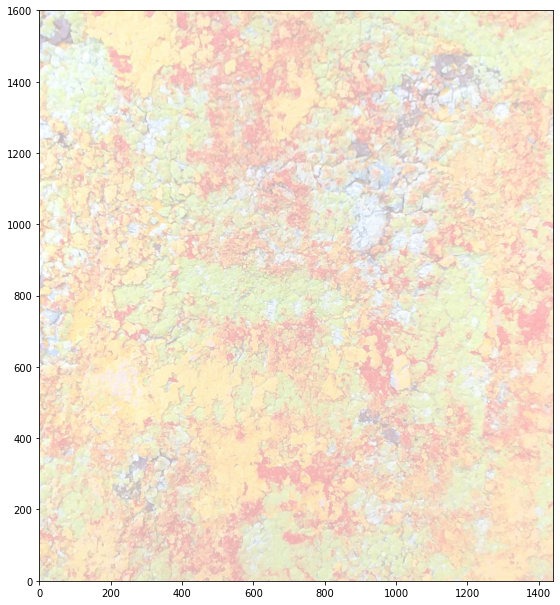

In [6]:
x_data = []
y_data = []

x = []
y = []

im = plt.imread("random.png")
image = Image.open('random.png')

fig, ax = plt.subplots(figsize=(8*1.5, 7*1.5))
ax.set_xlim(0, image.width)
ax.set_ylim(0, image.height)
ax.imshow(im, extent=[0, image.width, 0, image.height], zorder=0, alpha=0.3)
scatter, = ax.plot(0, 0)

In [7]:
def animation_frame(i):
    x_data.append(i)
    y_data.append(i)
    
    scatter.set_xdata(x_data)
    scatter.set_ydata(y_data)
    return scatter


In [14]:
x_data = [ cols['Gaze point X'] for i, cols in clean.head(3).iterrows()]
y_data = [ cols['Gaze point Y'] for i, cols in clean.head(3).iterrows()]

In [15]:

def gaze_frame(row):
    x_data.pop(0)
    y_data.pop(0)
    x_data.append(row[1]['Gaze point X'])
    y_data.append(row[1]['Gaze point Y'])
    scatter.set_xdata(x_data)
    scatter.set_ydata(y_data)
     
    return scatter

In [16]:
frame_length = 120000 // len(clean)
frame_length
clean = clean.tail(240)

In [17]:
animation = FuncAnimation(fig, func=gaze_frame, frames=clean.tail(-3).iterrows(), interval=120, repeat=False)
HTML(animation.to_html5_video())
#animation.save('animation.avi', repeat=False, fps=9773)
